In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.6MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 194kB 58.9MB/s 
     |████████████████████████████████| 1.2MB 59.4MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', 'd696f71963c443f79d7a75f9cbc2ec4d')

In [5]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
plants_types = 'succulent','cactus','tree'
path = Path('plants')

In [7]:
if not path.exists():
    path.mkdir()
    for o in plants_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#431) [Path('plants/tree/00000092.jpg'),Path('plants/tree/00000108.jpg'),Path('plants/tree/00000144.jpg'),Path('plants/tree/00000010.jpg'),Path('plants/tree/00000009.jpg'),Path('plants/tree/00000147.jpg'),Path('plants/tree/00000074.jpg'),Path('plants/tree/00000022.jpg'),Path('plants/tree/00000054.jpg'),Path('plants/tree/00000110.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#1) [Path('plants/cactus/00000135.jpeg')]

In [10]:
failed.map(Path.unlink);

In [11]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = plants.dataloaders(path)

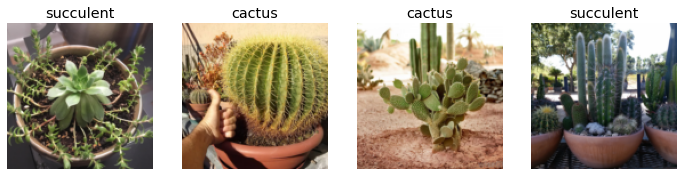

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

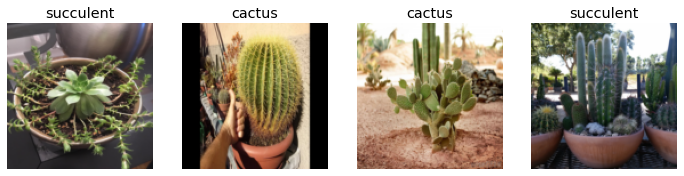

In [14]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = plants.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

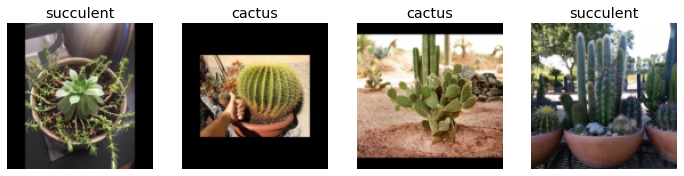

In [15]:
plants = plants.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = plants.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

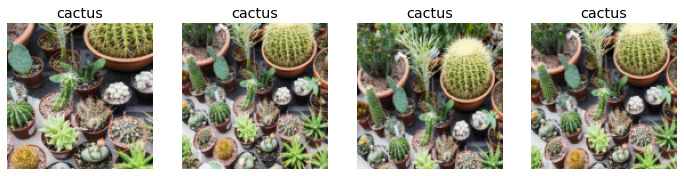

In [16]:
plants = plants.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

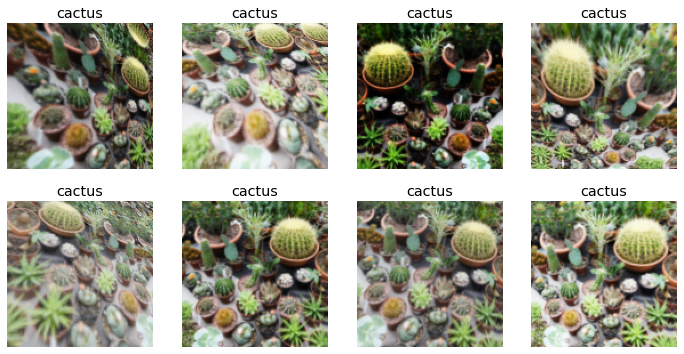

In [17]:
plants = plants.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = plants.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [18]:
plants = plants.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = plants.dataloaders(path)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


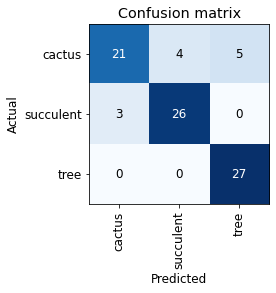

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

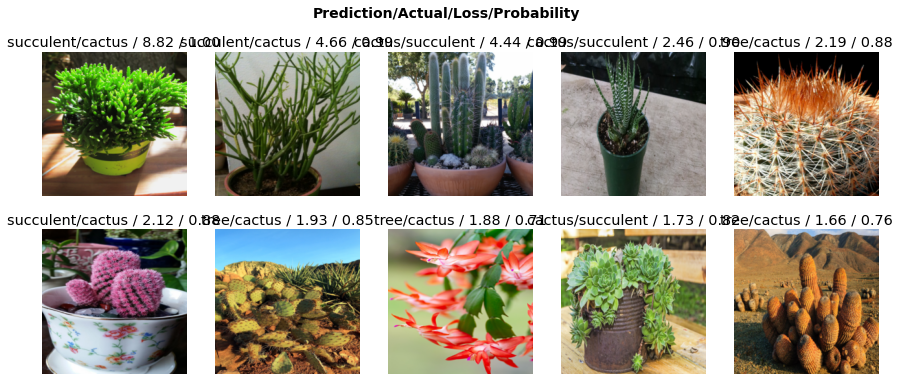

In [23]:
interp.plot_top_losses(10, nrows=2)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

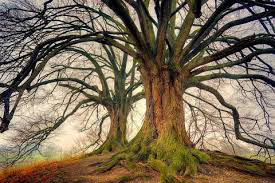

In [30]:
img = PILImage.create(btn_upload.data[-1])
img

In [31]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [32]:
pred,pred_idx,probs = learn_inf.predict(img)

In [33]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: tree; Probability: 0.9727')

In [34]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [35]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [36]:
btn_upload = widgets.FileUpload()

In [40]:
VBox([widgets.Label('Select your plants!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [39]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.9MB 18.0MB/s 
     |████████████████████████████████| 194kB 23.5MB/s 
     |████████████████████████████████| 552kB 55.9MB/s 
     |████████████████████████████████| 112kB 59.8MB/s 
     |████████████████████████████████| 430kB 56.1MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=d292f1a476e95c1d0d2b8b5fdb44854548e8ad540fca771f24a7de8b53254da8
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: nbdev 1.1.12 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
